In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
data = load_iris()

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
data["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris_X = pd.DataFrame(data["data"], columns= data["feature_names"])
iris_X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
iris_y = pd.DataFrame(data["target"])
iris_y["class"] = iris_y
iris_y = iris_y.drop(0, axis=1)
iris_y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [7]:
frames = [iris_X,iris_y]
df = pd.concat(frames, axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
species = []
for i in df['class']:
    if i == 0:
        species.append('setosa')
    elif i == 1:
        species.append('versicolor')
    elif i == 2:
        species.append('virginica')        

In [10]:
df["species"] = species
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
df.to_csv("IRIS.csv", index = False)

In [11]:
X = df.drop(["class", "species"], axis=1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
y = df["species"]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [15]:
from sklearn.cluster import KMeans

In [16]:
model = KMeans(n_clusters=3)

In [17]:
model.fit(X_train)

KMeans(n_clusters=3)

In [18]:
labels = model.predict(X_train)
labels.shape

(127,)

In [19]:
y_train.shape

(127,)

### Aligning labels and species

Before considering the problem of how to measure the quality of a clustering, we'll take a direct approach to compare the clusters with the iris species in a way that doesn't require our samples to come pre-grouped into species. This measure of quality can then be used to make an informed choice about the number of clusters to look for.

In [20]:
new_df = pd.DataFrame({"cluster_labels":labels, "species": y_train})
new_df

,cluster_labels,species
65,1,versicolor
97,1,versicolor
64,1,versicolor
93,1,versicolor
114,1,virginica
...,...,...
63,1,versicolor
70,1,versicolor
81,1,versicolor
11,0,setosa


### Crosstab of labels and species

Firstly, let's check whether the 3 clusters of iris samples have any correspondence to the iris species. The correspondence is described by a table.Tables like these are called `"cross-tabulations"`.

There is one column for each of the three species of iris: setosa, versicolor and virginica, and one row for each of the three cluster labels: 0, 1 and 2. The table shows the number of samples that have each possible cluster label/species combination.

In [21]:
cross_tab = pd.crosstab(new_df["cluster_labels"], new_df["species"])
cross_tab

species,setosa,versicolor,virginica
cluster_labels,,,
0,42,0,0
1,0,40,11
2,0,2,32


we see that cluster 0 corresponds perfectly with the species setosa. On the other hand, while cluster 2 contains mainly virginica samples, there are also some virginica samples in cluster 1.

### Measuring clustering quality

Cross tabulations like these provide great insights into which sort of samples are in which cluster. But in most datasets, the samples are not labelled by species. How can the quality of a clustering be evaluated in these cases? We need a way to measure the quality of a clustering that uses only the clusters and the samples themselves.

### Inertia:
A good clustering has tight clusters, meaning that the samples in each cluster are bunched together, not spread out. How spread out the samples within each cluster are can be measured by the "inertia". Intuitively, inertia measures how far samples are from their centroids.

We want clusters that are not spread out, so lower values of the inertia are better. The inertia of a kmeans model is measured automatically when any of the fit methods are called, and is available afterwards as the inertia attribute. In fact, kmeans aims to place the clusters in a way that minimizes the inertia.

In [22]:
## Calculating Inertia
model.inertia_

66.00686274509805

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


583.4433070866143
130.51037940379408
66.00686274509805
48.10102923976607
38.41405075930934


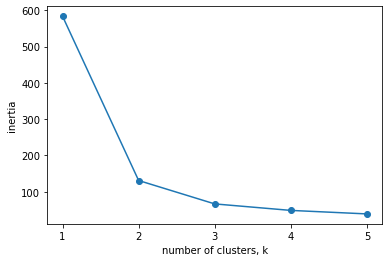

In [23]:
num_clusters = range(1, 6)
inertias = []
for k in num_clusters:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(X_train)
    print(model.inertia_)
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(num_clusters)
plt.show()

#### The number of clusters

Here is a plot of the inertia values of clusterings of the iris dataset with different numbers of clusters. Our kmeans model with 3 clusters has relatively low inertia, which is great. But notice that the inertia continues to decrease slowly. So what's the best number of clusters to choose?

#### How many clusters to choose?

Ultimately, this is a trade-off. A good clustering has tight clusters (meaning low inertia). But it also doesn't have too many clusters. A good rule of thumb is to choose an elbow in the inertia plot, that is, a point where the inertia begins to decrease more slowly. For example, by this criterion, 3 is a good number of clusters for the iris dataset.

In [54]:
from sklearn.preprocessing import Normalizer

In [55]:
scaler = Normalizer()

In [56]:
new_model2 = KMeans(n_clusters=3)

In [57]:
from sklearn.pipeline import make_pipeline

In [58]:
pipeline = make_pipeline(scaler, new_model2)

In [59]:
pipeline.fit(X_train)

Pipeline(steps=[('normalizer', Normalizer()), ('kmeans', KMeans(n_clusters=3))])

In [60]:
labels2 = pipeline.predict(X_train)
labels2

array([0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 0, 2,
       1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 0, 2, 2, 2, 1, 0,
       1, 2, 2, 0, 2, 0, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 2, 1, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1,
       0, 2, 1, 0, 1, 2, 0, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 1, 0, 2, 2, 2,
       2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 0, 1, 0])

In [61]:
# Create a DataFrame with labels and varieties as columns: df
new_df2 = pd.DataFrame({'labels': labels2, 'species': y_train})
new_df2.head()

,labels,species
65,0,versicolor
97,0,versicolor
64,0,versicolor
93,0,versicolor
114,2,virginica


In [62]:
# Create crosstab: ct
ct2 = pd.crosstab(new_df2["labels"], new_df2["species"])
ct2 ## with normalizer

species,setosa,versicolor,virginica
labels,,,
0,0,37,0
1,42,0,0
2,0,5,43


In [63]:
cross_tab ## without normalizer

species,setosa,versicolor,virginica
cluster_labels,,,
0,42,0,0
1,0,40,11
2,0,2,32


In [64]:
xs = X_train.iloc[:,0]

In [65]:
ys = X_train.iloc[:,2]

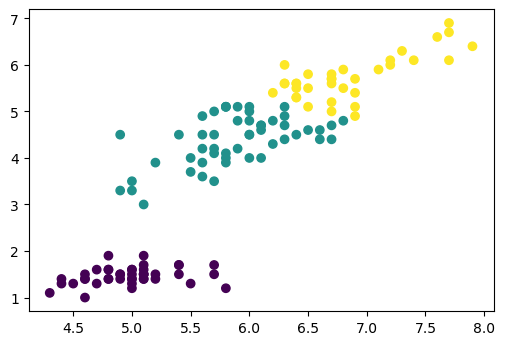

In [66]:
plt.figure(figsize=(6,4), dpi=100)
plt.scatter(xs,ys, c = labels)
plt.show()

In [67]:
centroids = model.cluster_centers_
centroids

array([[4.98095238, 3.39047619, 1.46666667, 0.23809524],
       [6.53043478, 3.06086957, 5.52173913, 2.16956522],
       [5.5       , 2.56842105, 3.82631579, 1.17894737],
       [7.48      , 3.17      , 6.31      , 2.1       ],
       [6.15454545, 2.88484848, 4.71818182, 1.55757576]])

In [68]:
centroids_x = centroids[:,0]
centroids_x

array([4.98095238, 6.53043478, 5.5       , 7.48      , 6.15454545])

In [69]:
centroids_y = centroids[:,2]
centroids_y

array([1.46666667, 5.52173913, 3.82631579, 6.31      , 4.71818182])

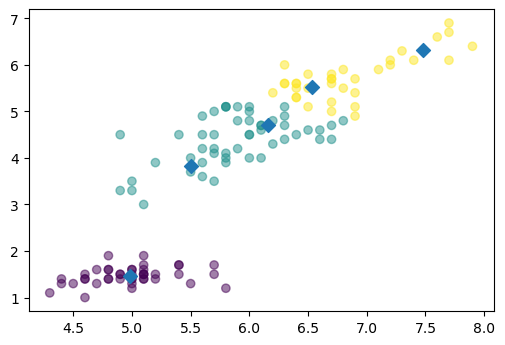

In [70]:
plt.figure(figsize=(6,4), dpi=100)
plt.scatter(xs,ys, c = labels, alpha = 0.5)
plt.scatter(centroids_x,centroids_y, marker = "D", s = 50)
plt.show()

In [71]:
new_labels = model.predict(X_test)
new_labels

array([0, 0, 0, 3, 4, 4, 4, 2, 4, 0, 1, 0, 0, 3, 4, 4, 2, 2, 0, 4, 2, 0,
       2])

In [72]:
xn = X_test.iloc[:,0]

In [73]:
yn= X_test.iloc[:,2]

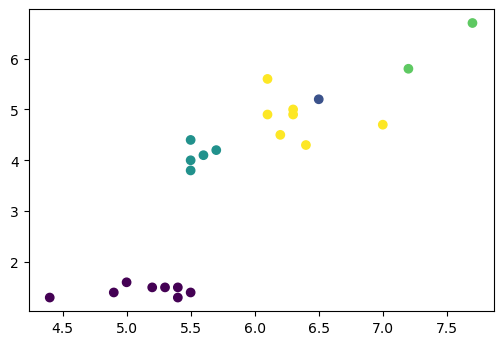

In [74]:
plt.figure(figsize=(6,4), dpi=100)
plt.scatter(xn,yn, c = new_labels)